# Data analysis

In [192]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [193]:
%run Mappings.ipynb
%run Helpers.ipynb
# %run /content/drive/MyDrive/DentistDataAnalysis/Experiments/Mappings.ipynb
# %run /content/drive/MyDrive/DentistDataAnalysis/Experiments/Helpers.ipynb

In [194]:
# DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/'
# IMG_DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/images/'
# FIG_DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/figures/'
# STAT_DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/statistics/'
DIR = ''
IMG_DIR = 'images/'
FIG_DIR = 'figures/'
STAT_DIR = 'statistics/'
all_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f', 'Que14', 'Que15', 'Que16', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22', 'Que_smoking']
without_target_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22', 'Que_smoking']
numeric_cols = ['Que18_age', 'Pit18_starost']
target_col = 'Pit16'
questions_LANG = questions_SR
questions_map_LANG = questions_map_SR

## Loading data

In [202]:
source_data = pd.read_excel(DIR+'dataset/TusekI_DataSet_Pregnangcy.xlsx', usecols=source_columns_SR, engine='openpyxl')
source_data.columns = source_columns_EN

## Data wrangling

Any impossible answer is marked as missing.

In [196]:
for index, row in source_data.iterrows():
    for col in source_data.columns:
        if col=='Que1' or col=='Que14' or col=='Que15' or col=='Que22':
            if row[col]<=0 or row[col]>5:
                row[col] = np.nan
        elif col=='Que2' or col=='Que4' or col=='Que6' or col=='Que16':
            if row[col]<=0 or row[col]>6:
                row[col] = np.nan
        elif col=='Que3' or col=='Que5' or col=='Que10_a' or col=='Que10_b' or col=='Que10_c' or col=='Que10_d' or col=='Que10_e' or col=='Que10_f' or col=='Que19' or col=='Que20' or col=='Que21':
            if row[col]<=0 or row[col]>4:
                row[col] = np.nan
        elif col=='Que11' or col=='Que12' or col=='Que13' or col=='Que17':
            if row[col]<=0 or row[col]>3:
                row[col] = np.nan
        elif col=='Que18_age':
            if row[col]<15 or row[col]>50:
                row[col] = np.nan
# marking answers 2 and 3 with nan if it is answered with 1
source_data.loc[source_data['Que1']==1, 'Que2'] = np.nan
source_data.loc[source_data['Que1']==1, 'Que3'] = np.nan
source_data.loc[source_data['Que5']==1, 'Que6'] = np.nan

### Smoking

Only one column is enough for smoking. If the pregnant woman smoked in any trimester then she is marked as smoker.

In [197]:
source_data['Que_smoking'] = np.nan

In [198]:
#1 - yes
#2 - no
for index, row in source_data.iterrows():
    if row['Que11']==3 and row['Que12']==3 and row['Que13']==3:
        row['Que_smoking']=2
    elif row['Que11']==1 or row['Que11']==2 or row['Que12']==1 or row['Que12']==2 or row['Que13']==1 or row['Que13']==2:
        row['Que_smoking']=1
    else:
        row['Que_smoking']=np.nan
source_data = source_data.drop(['Que11', 'Que12', 'Que13'], axis=1)

## Getting data subset

For this research we don't need all provided columns. After getting subset we save this data for further use, this data is marked as final for use in this research.

Column that we need: 'Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f', 'Que14', 'Que15', 'Que16', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22', 'Que_smoking'.

In [199]:
out_data = source_data[all_cols]
out_data.to_csv(DIR+'dataset/final_data.csv', index=False)
out_data.columns = [column_final_EN_to_SR[col] for col in out_data.columns]

## Simple statistics

In [200]:
out_data.describe().transpose().to_csv(STAT_DIR+'data_describe.csv')
out_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pit1,3940.0,3.039594,1.213220,1.0,2.0,2.0,4.0,5.0
Pit2,3878.0,3.247550,1.507128,1.0,2.0,3.0,5.0,6.0
Pit3,3762.0,2.750930,0.821737,1.0,2.0,3.0,3.0,4.0
Pit4,2927.0,4.016057,0.967384,1.0,4.0,4.0,4.0,6.0
Pit5,3762.0,2.293993,1.161837,1.0,1.0,2.0,3.0,4.0
Pit6,2367.0,2.583016,1.830224,1.0,1.0,1.0,4.0,6.0
Pit10_a,3874.0,1.320599,0.566701,1.0,1.0,1.0,2.0,4.0
Pit10_b,3783.0,1.719535,0.645823,1.0,1.0,2.0,2.0,4.0
Pit10_c,3708.0,2.777238,0.627144,1.0,2.0,3.0,3.0,4.0
Pit10_d,3678.0,2.271887,0.666236,1.0,2.0,2.0,3.0,4.0


In [201]:
data_mapped = perform_mapping(out_data, questions_map_LANG)
data_mapped.describe().transpose().to_csv(STAT_DIR+'data_mapped_describe.csv')
data_mapped.describe().T

,count,mean,std,min,25%,50%,75%,max
Pit1,3940.0,0.198985,0.399287,0.0,0.0,0.0,0.0,1.0
Pit2,3906.0,0.451357,0.497692,0.0,0.0,0.0,1.0,1.0
Pit3,3790.0,0.695778,0.460138,0.0,0.0,1.0,1.0,1.0
Pit4,2927.0,0.213529,0.409868,0.0,0.0,0.0,0.0,1.0
Pit5,3762.0,0.369750,0.482801,0.0,0.0,0.0,1.0,1.0
Pit6,3758.0,0.634380,0.481668,0.0,0.0,1.0,1.0,1.0
Pit10_a,3874.0,0.270521,0.444287,0.0,0.0,0.0,1.0,1.0
Pit10_b,3783.0,0.098599,0.298162,0.0,0.0,0.0,0.0,1.0
Pit10_c,3708.0,0.729234,0.444415,0.0,0.0,1.0,1.0,1.0
Pit10_d,3678.0,0.353453,0.478107,0.0,0.0,0.0,1.0,1.0


Correlation matrix

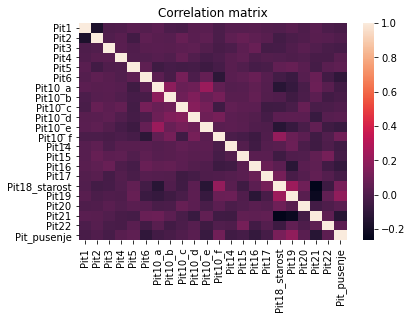

In [126]:
corr = out_data.corr().round(2)
corr.to_csv(STAT_DIR+'correlation_matrix.csv')
fig, ax = plt.subplots()
ax = sns.heatmap(out_data.corr(),
            xticklabels=out_data.columns,
            yticklabels=out_data.columns)
ax.set_title('Correlation matrix')
fig.savefig(FIG_DIR+'correlation_matrix.png', bbox_inches='tight', dpi=fig.dpi)

## Plotting

Barplot for target column.

In [127]:
data = out_data.copy()

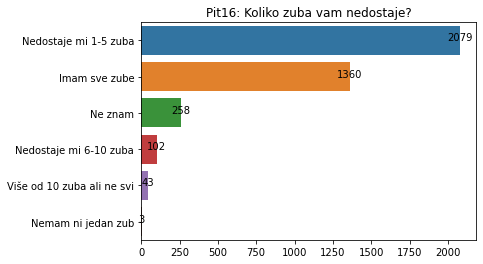

In [128]:
title = questions_LANG[target_col]['text'] 
barplot(target_col, data[[target_col]], title, numeric_cols, questions_LANG)

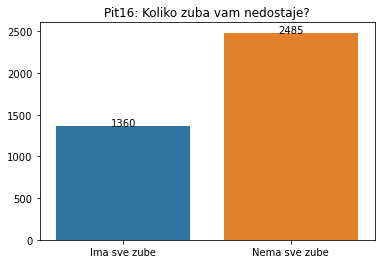

In [129]:
target = pd.DataFrame(data[target_col])
target_data = perform_mapping(target, questions_map_LANG)
title = questions_LANG[target_col]['text'] 
fig, ax = plt.subplots()
val_cnts = target_data[target_col].value_counts().sort_values()
text = ['Ima sve zube', 'Nema sve zube']
# replace x and y with each other for vertical plot
ax = sns.barplot(x=text, y=val_cnts.values)
ax.set_title(target_col+': '+title)
for ind, val in enumerate(val_cnts):
    ax.text(ind, val, val, color='black', ha="center")
    #for plot vertical plot
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig(FIG_DIR+target_col+'_mapped_barplot_.png', bbox_inches='tight', dpi=fig.dpi)

Barplot for all non numerical columns except target column (Que16) and histplot for numerical columns.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


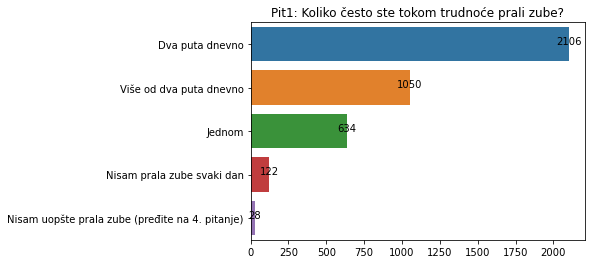

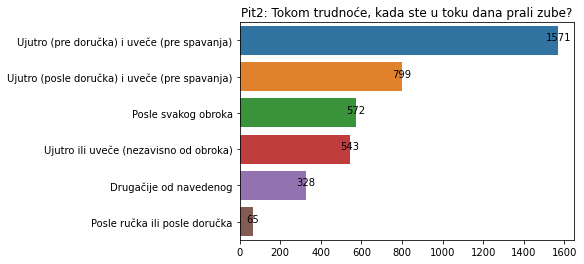

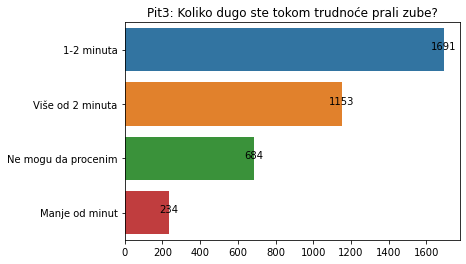

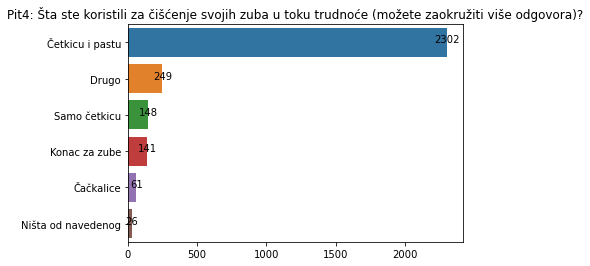

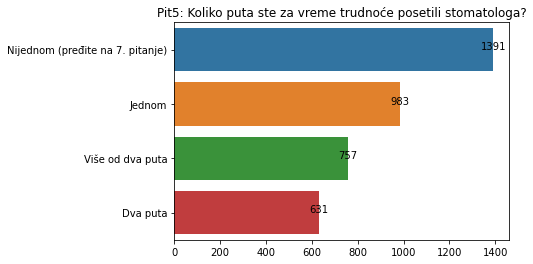

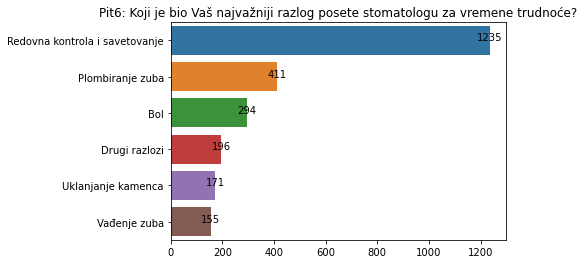

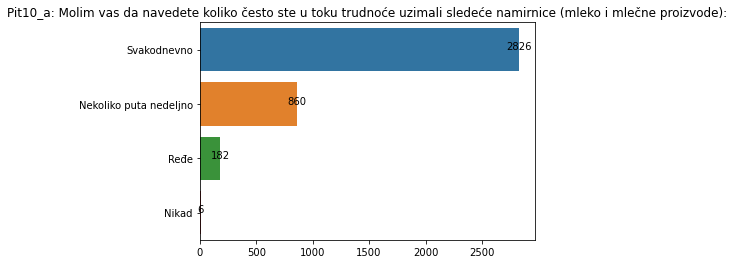

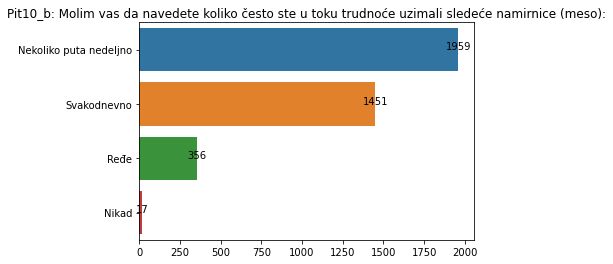

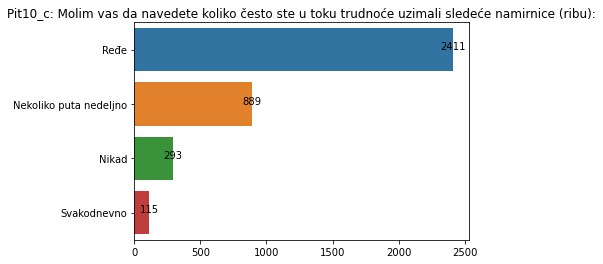

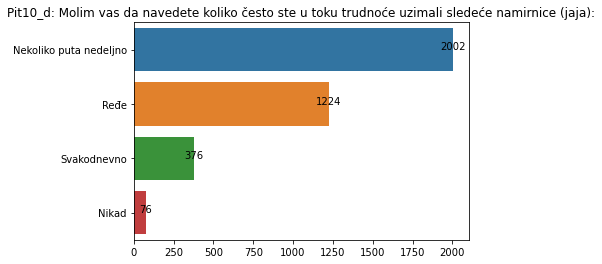

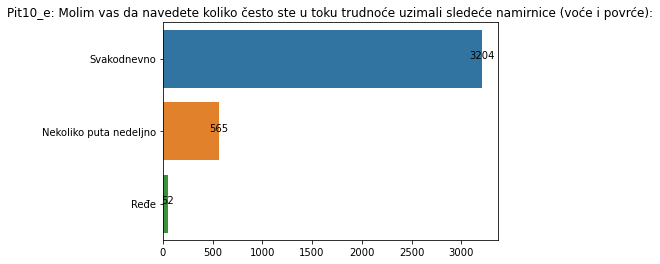

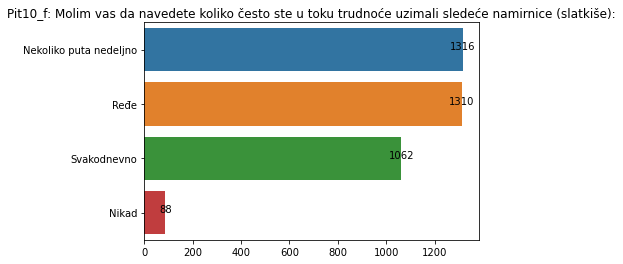

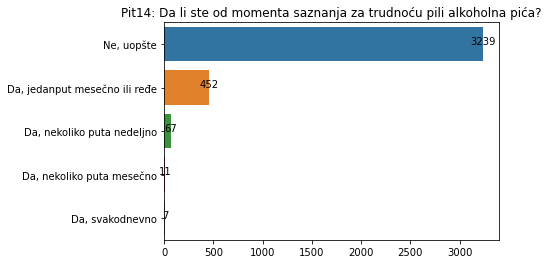

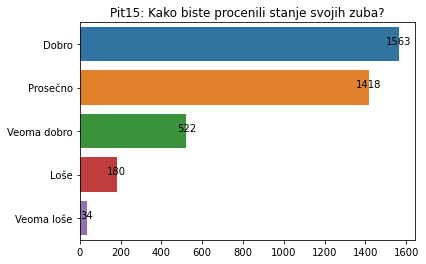

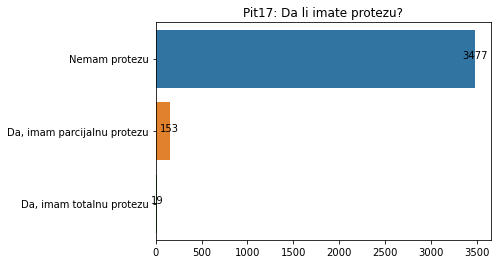

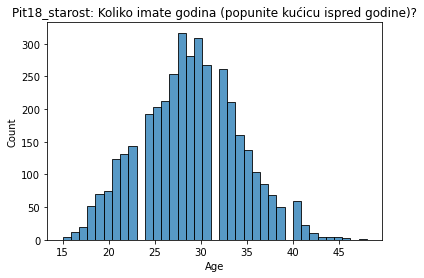

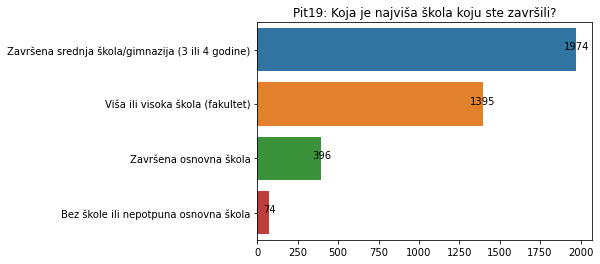

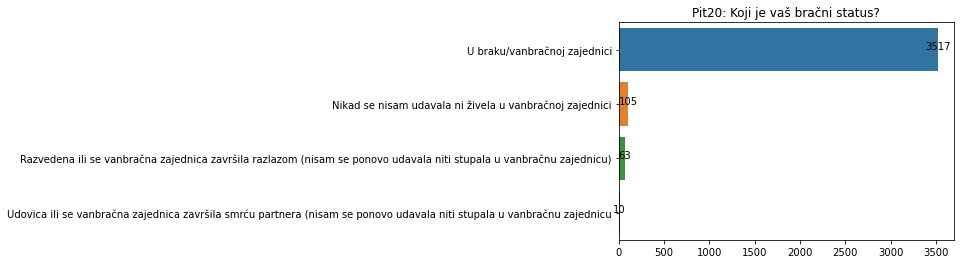

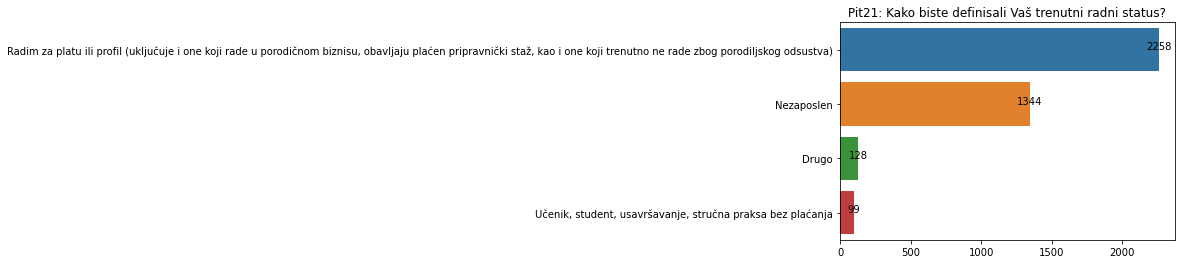

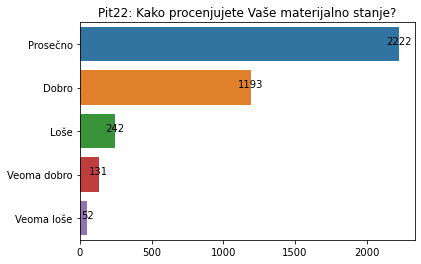

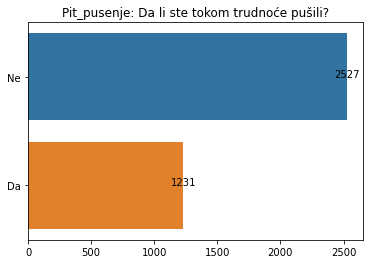

In [130]:
for col in data.columns:
    if col==target_col:
        continue
    title = questions_LANG[col]['text'] 
    barplot(col, data, title, numeric_cols, questions_LANG)

Mapping answers from target column (Que16) in two classes (0 - good habbits, 1 - bad habbits) for further plotting.

In [131]:
target = pd.DataFrame(data[target_col])
target_data = perform_mapping(target, questions_map_LANG)
data[target_col] = target_data

Plotting differences in occurrences for two classes (missing and not missing teeths) for each question.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


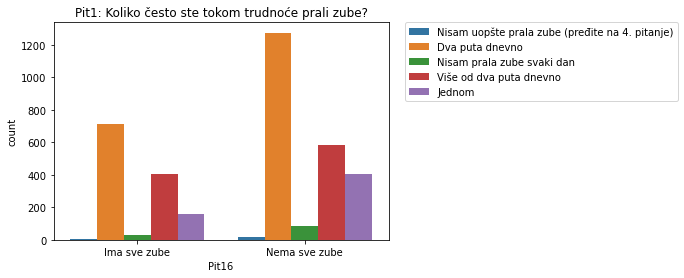

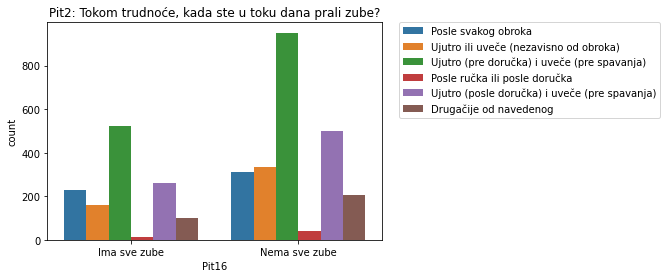

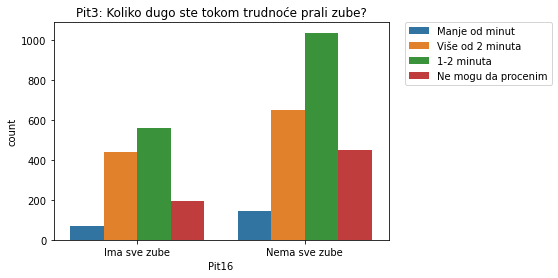

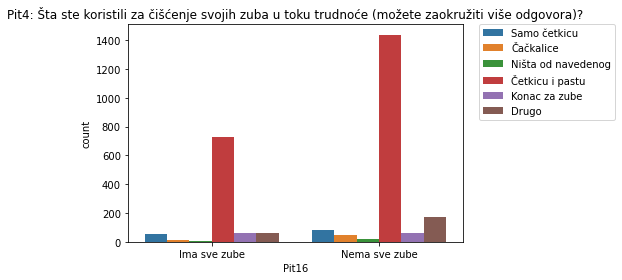

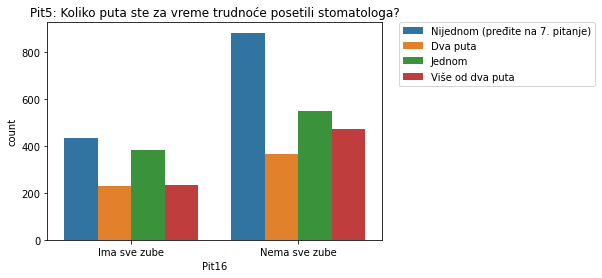

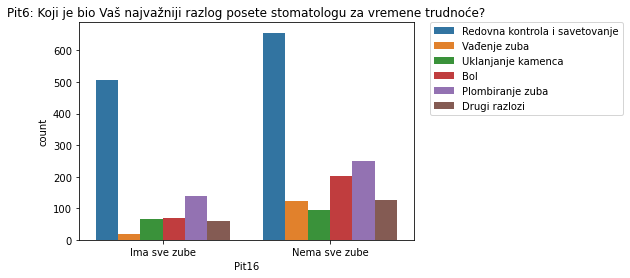

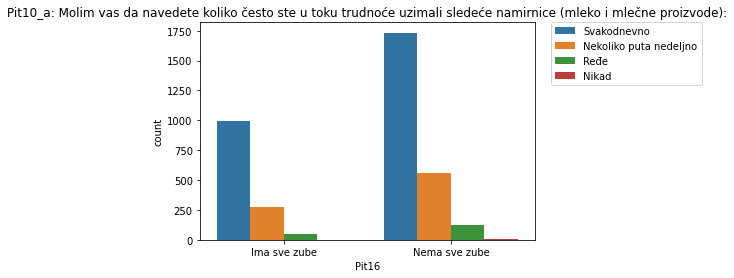

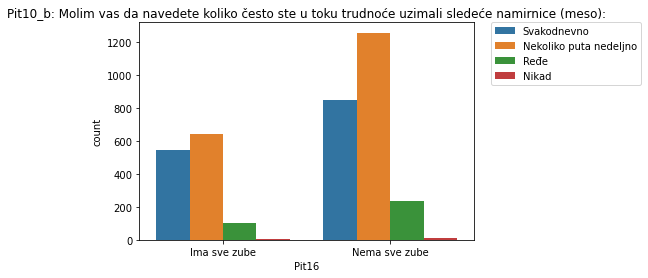

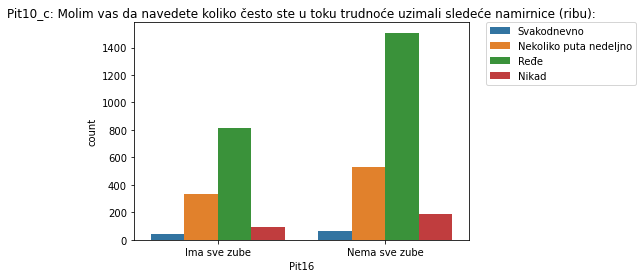

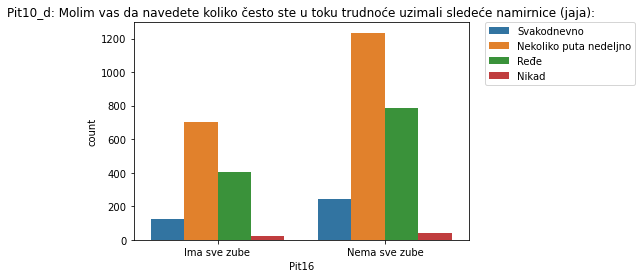

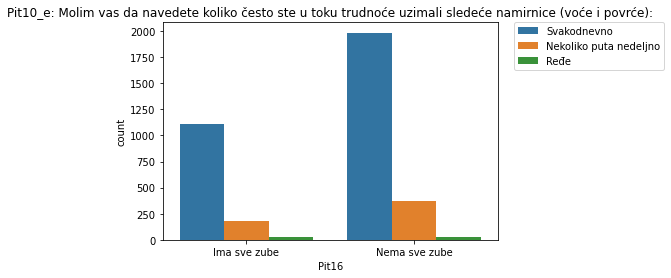

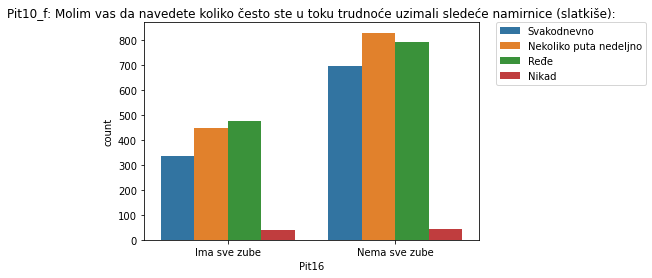

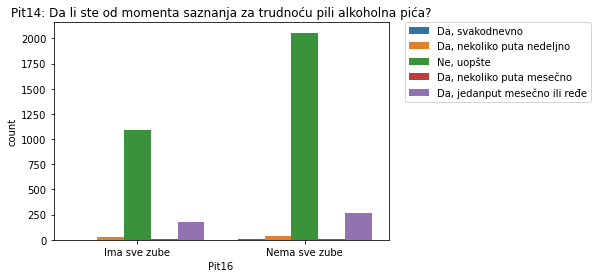

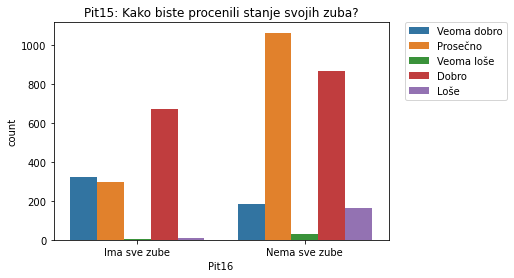

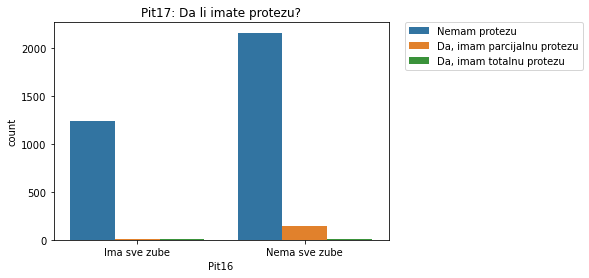

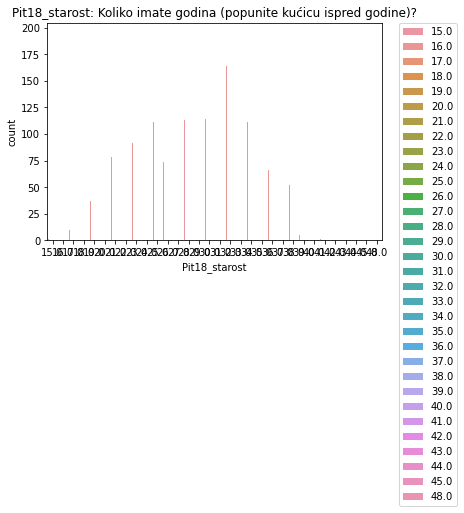

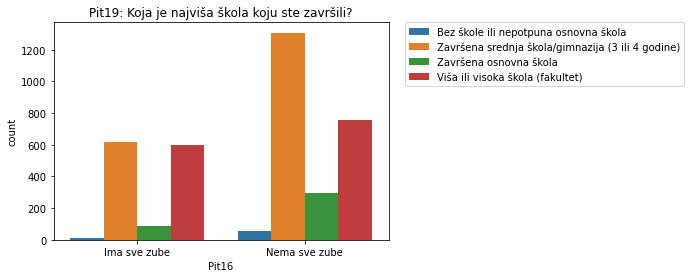

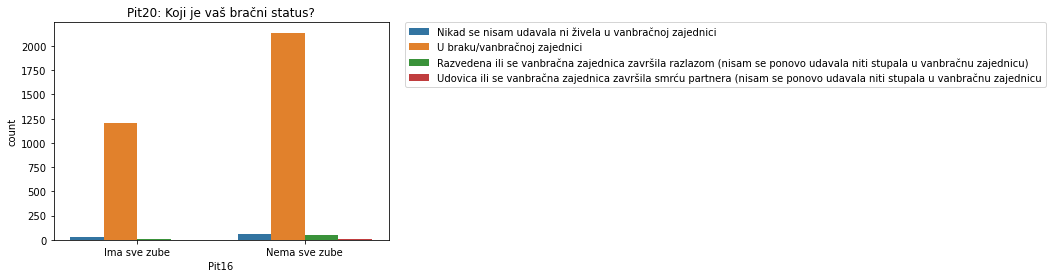

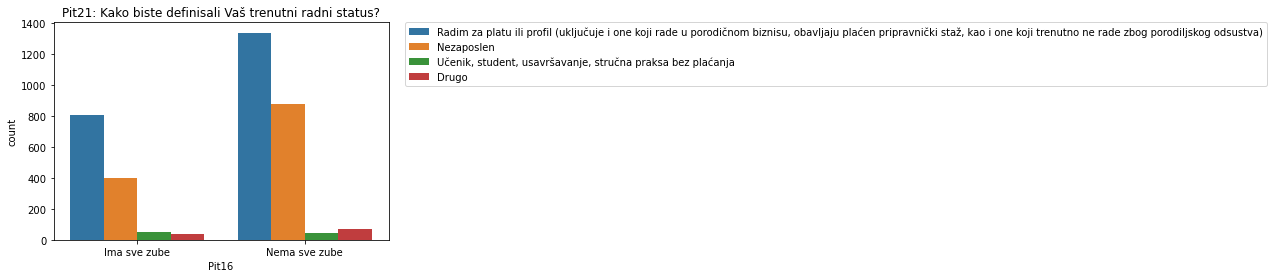

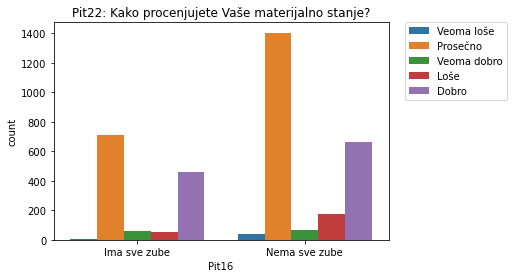

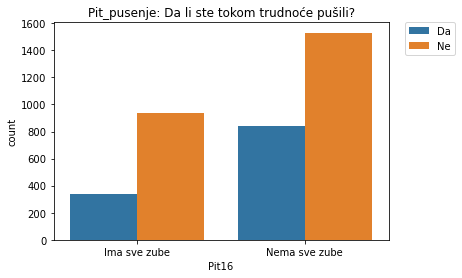

In [132]:
for col in data.columns:
    if col==target_col:
        continue
    else:
        counts_df = data.groupby([col, target_col])[col].count()
        data_sub = counts_df.to_frame(name='count').reset_index()
        fig, ax = plt.subplots()
        if col in numeric_cols:
            legend_labels = [ind for ind in data_sub[col].unique()]        
            data_sub[target_col+'_legend'] = data_sub[target_col].map(dict(zip(range(0,2), legend_labels)))
            ax = sns.barplot(x=col, y='count', hue=target_col+'_legend', hue_order=legend_labels, data=data_sub)
        else:
            legend_labels = [questions_LANG[col][ind] for ind in data_sub[col].unique()]
            data_sub[col+'_legend'] = data_sub[col].map(questions_LANG[col])
            #que16_text = ['Not missing teeths', 'Missing teeths']
            que16_text = ['Ima sve zube', 'Nema sve zube']
            data_sub[target_col+'_text'] = data_sub[target_col].map(dict(zip(range(0,2), que16_text)))
            ax = sns.barplot(x=target_col+'_text', y='count',  hue=col+'_legend', hue_order=legend_labels, data=data_sub)
            ax.set_xlabel(target_col)
        title = questions_LANG[col]['text'] 
        ax.set_title(col+': '+title)
        lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
        fig.savefig(FIG_DIR+col+'_countplot.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=fig.dpi)

Plotting countplot for two classes (missing and not missing teeths) for each question to see proportion ratio of classes.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


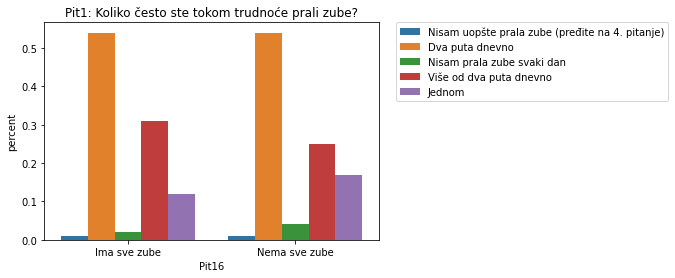

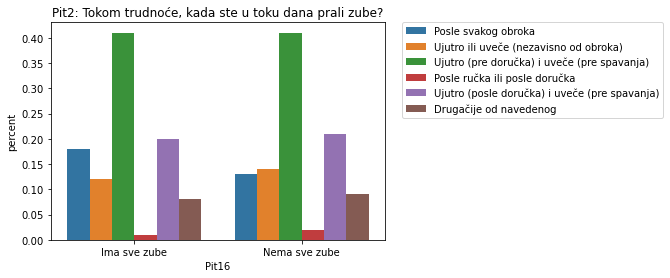

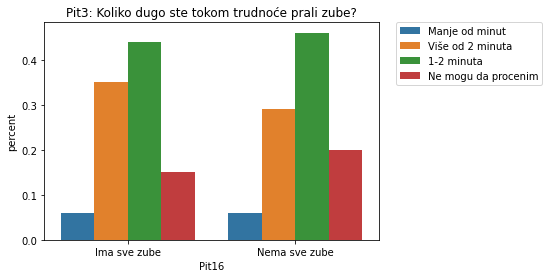

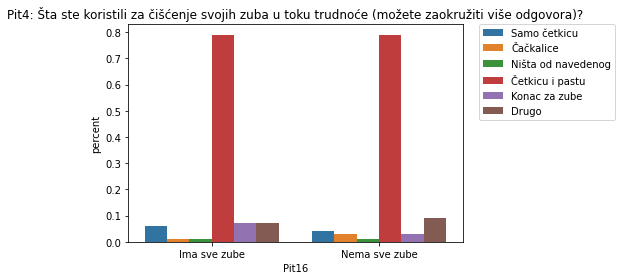

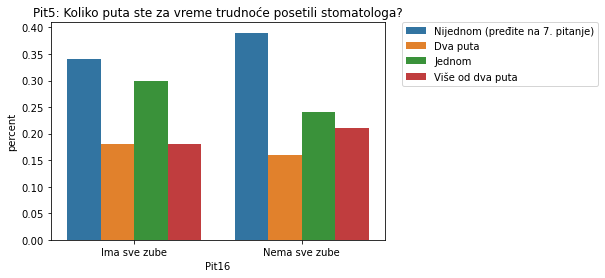

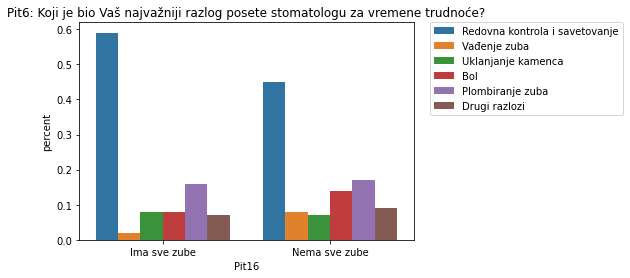

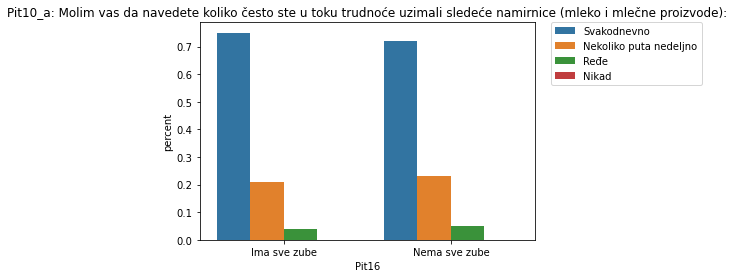

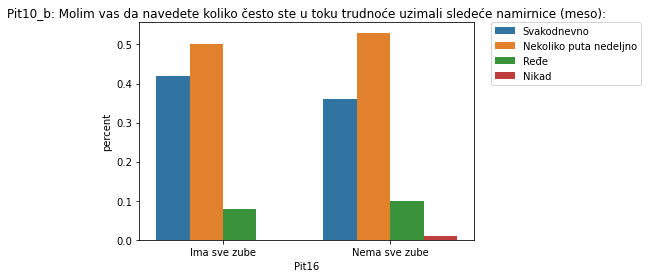

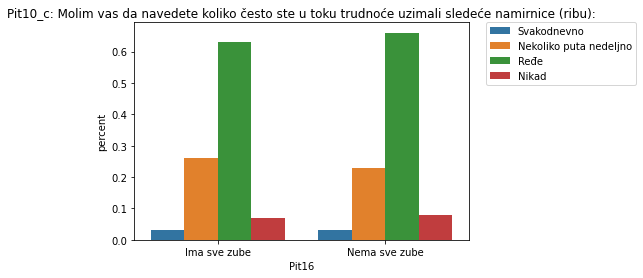

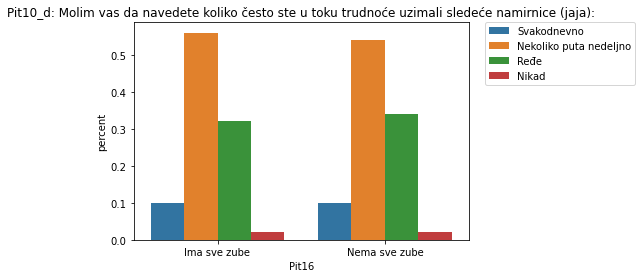

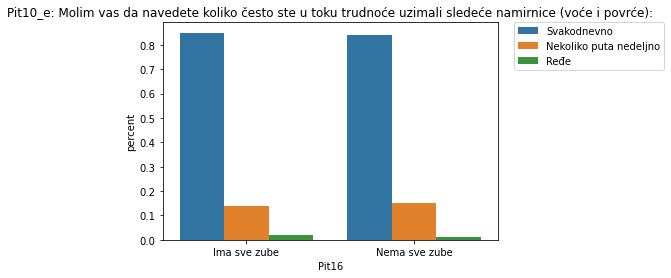

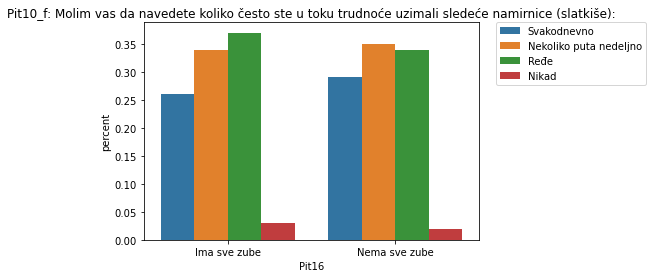

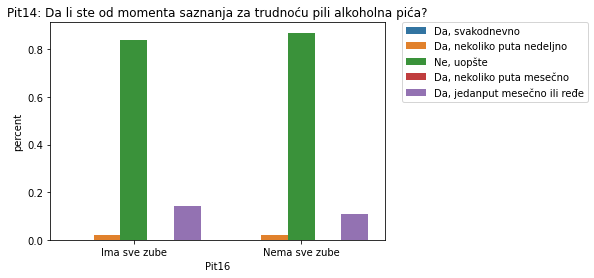

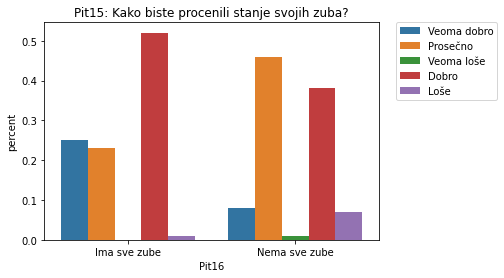

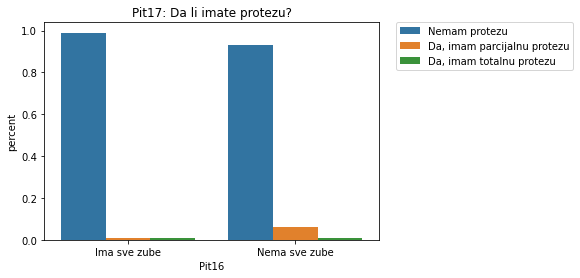

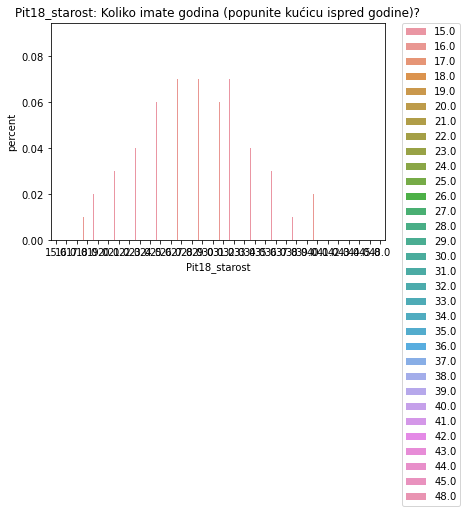

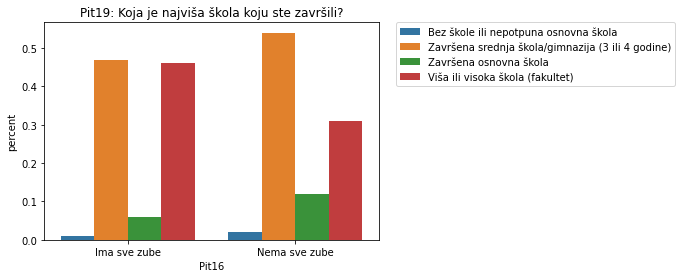

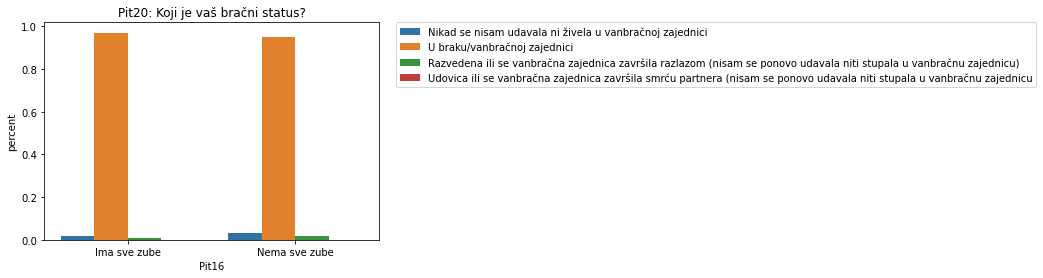

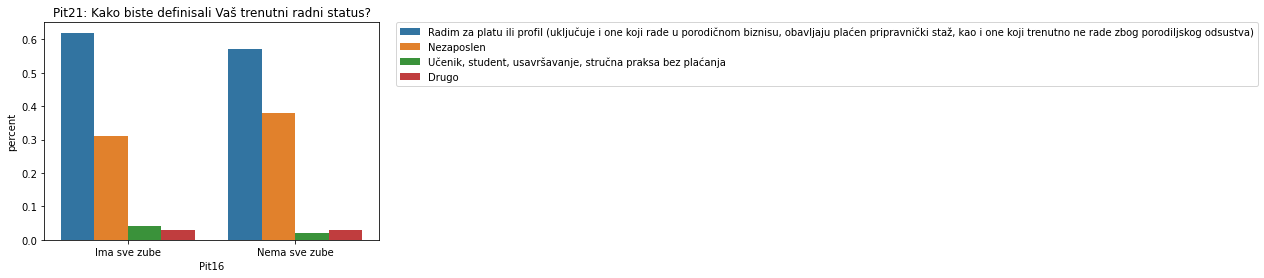

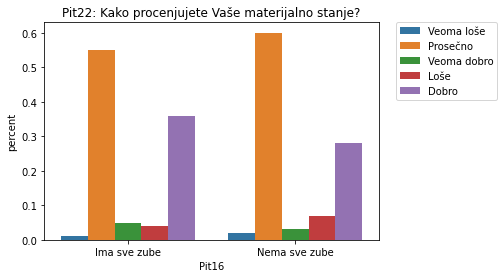

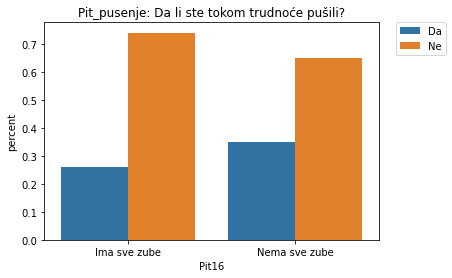

In [133]:
for col in data.columns:
    if col==target_col:
        continue
    else:        
        counts_df = data.groupby([col, target_col])[col].count()
        counts_df = counts_df.unstack()
        percents_df = counts_df.div(counts_df.sum()).unstack()
        data_sub = percents_df.to_frame(name='percent').reset_index().round(2)
        fig, ax = plt.subplots()
        if col in numeric_cols:
            legend_labels = [ind for ind in data_sub[col].unique()]        
            data_sub[target_col+'_legend'] = data_sub[target_col].map(dict(zip(range(0,2), legend_labels)))
            ax = sns.barplot(x=col, y='percent', hue=target_col+'_legend', hue_order=legend_labels, data=data_sub)
        else:
            legend_labels = [questions_LANG[col][ind] for ind in data_sub[col].unique()]
            data_sub[col+'_legend'] = data_sub[col].map(questions_LANG[col])
            #que16_text = ['Not missing teeths', 'Missing teeths']
            que16_text = ['Ima sve zube', 'Nema sve zube']
            data_sub[target_col+'_text'] = data_sub[target_col].map(dict(zip(range(0,2), que16_text)))
            ax = sns.barplot(x=target_col+'_text', y='percent',  hue=col+'_legend', hue_order=legend_labels, data=data_sub)
            ax.set_xlabel(target_col)
        title = questions_LANG[col]['text'] 
        ax.set_title(col+': '+title)
        lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
        fig.savefig(FIG_DIR+col+'_proportion_ratio.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=fig.dpi)

In [134]:
for col in data.columns:
    if col==target_col:
        continue
    counts_df = data.groupby([col, target_col])[col].count()
    num = counts_df.sum()
    counts_df = counts_df.unstack()
    percents_df = counts_df.div(counts_df.sum()).round(2)
    if col in numeric_cols:
        percents_df.to_csv(STAT_DIR+col+'_'+str(num)+'.csv')
    else:
        data_sub = percents_df.copy().unstack().reset_index()
        col_text = [questions_LANG[col][ind] for ind in data_sub[col]]
        data_sub[col+'_text'] = col_text
        data_sub.to_csv(STAT_DIR+col+'_'+str(num)+'.csv')

## Plotting - whole data mapped in classes

In [41]:
data = out_data.copy()
data = perform_mapping(data, questions_map_LANG)

Plotting differences in occurrences for two classes (missing and not missing teeths) for each question.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


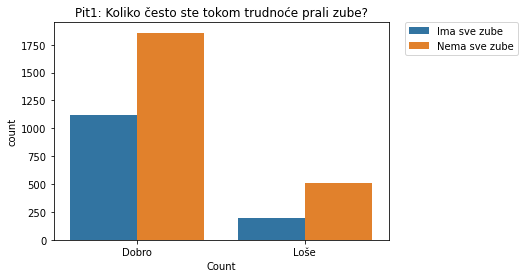

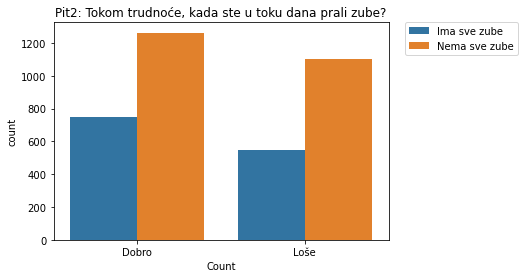

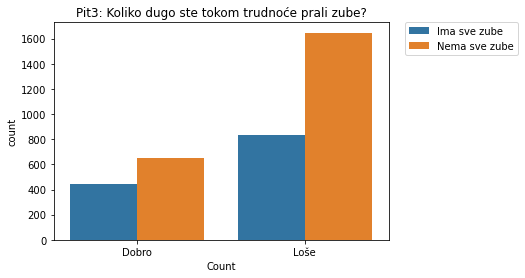

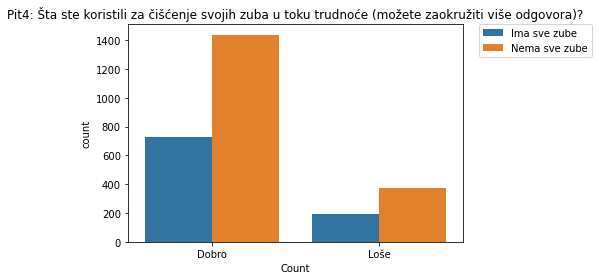

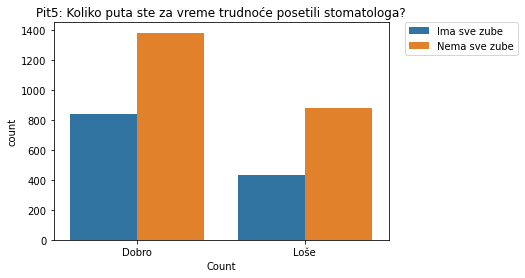

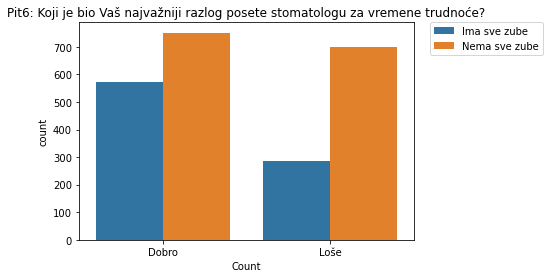

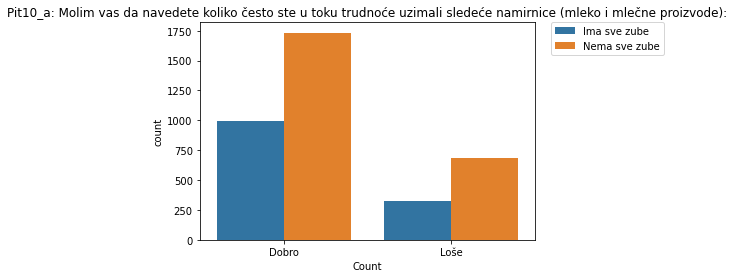

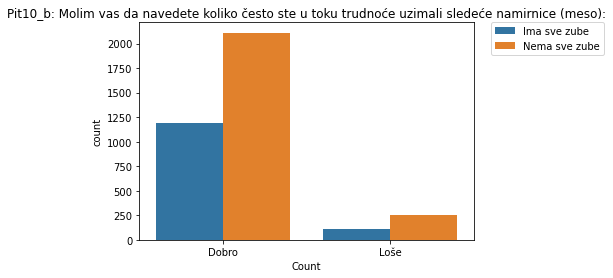

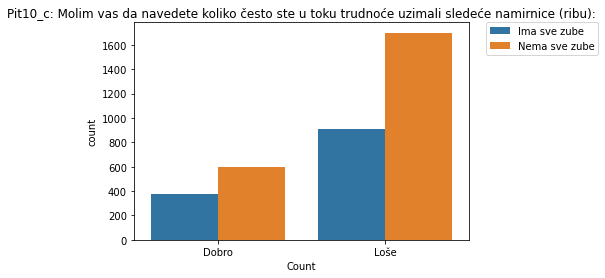

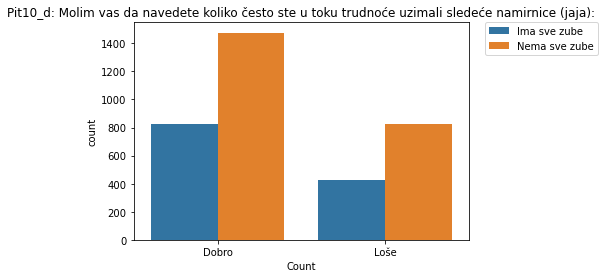

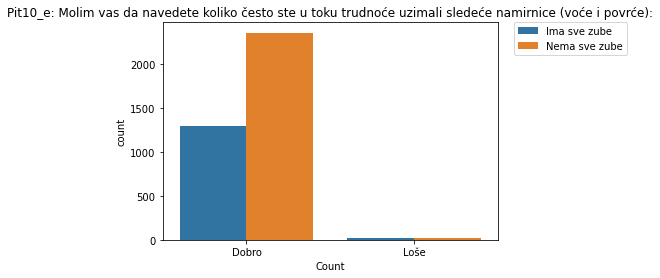

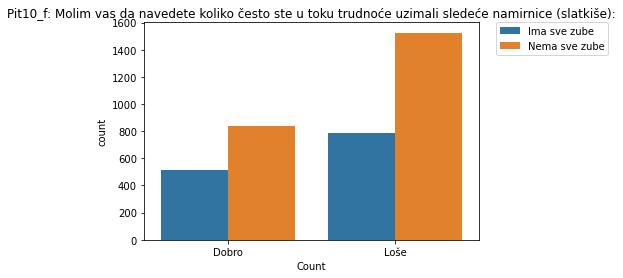

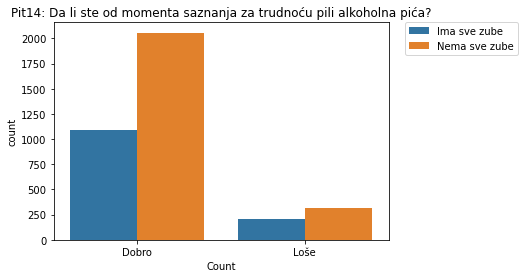

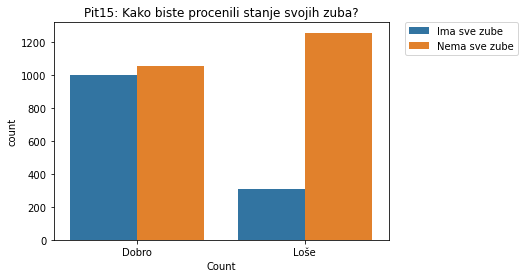

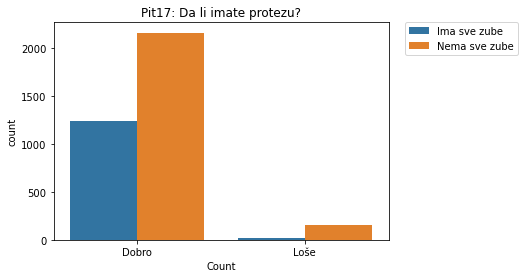

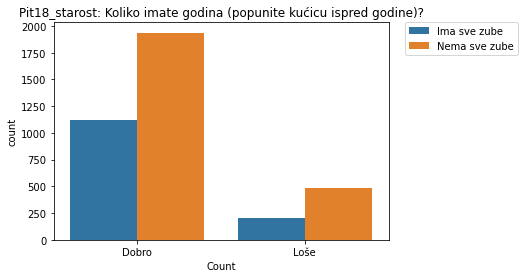

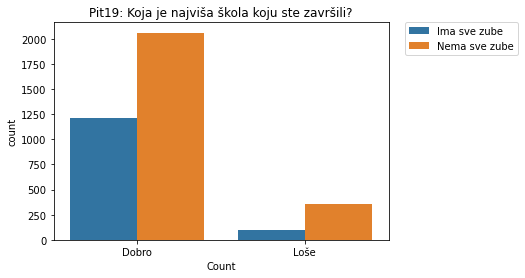

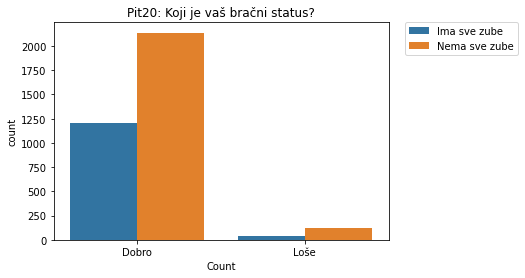

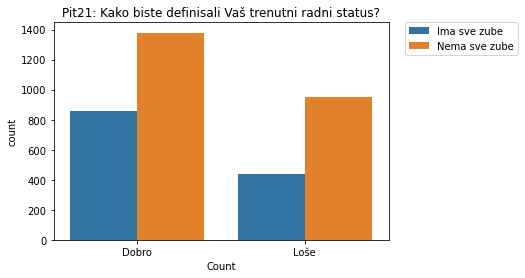

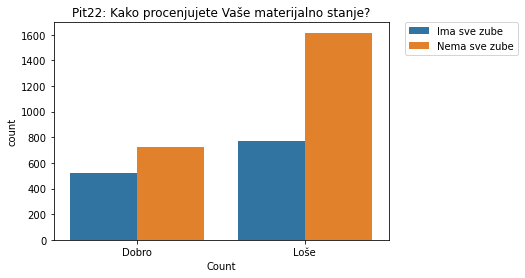

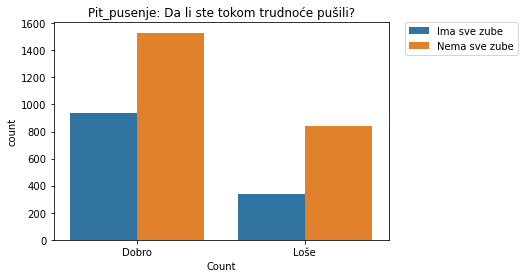

In [42]:
for col in data.columns:
    if col==target_col:
        continue
    else:
        counts_df = data.groupby([col, target_col])[col].count()
        data_sub = counts_df.to_frame(name='count').reset_index()
        #legend_labels = ['Not missing teeths', 'Missing teeths']
        legend_labels = ['Ima sve zube', 'Nema sve zube']
        #col_text = ['Good', 'Bad']
        col_text = ['Dobro', 'Loše']
        data_sub[target_col+'_legend'] = data_sub[target_col].map(dict(zip(range(0,2), legend_labels)))
        data_sub[col+'_text'] = data_sub[col].map(dict(zip(range(0,2), col_text)))
        fig, ax = plt.subplots()
        ax = sns.barplot(x=col+'_text', y='count', hue=target_col+'_legend', hue_order=legend_labels, data=data_sub)
        ax.set_xlabel('Count')
        title = questions_LANG[col]['text'] 
        ax.set_title(col+': '+title)
        lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
        fig.savefig(FIG_DIR+col+'_map_countplot.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=fig.dpi)

Plotting countplot for two classes (missing and not missing teeths) for each question to see proportion ratio of classes.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


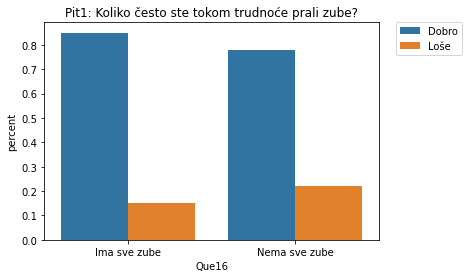

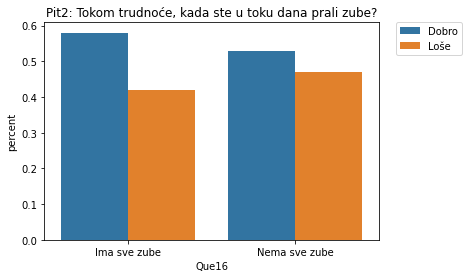

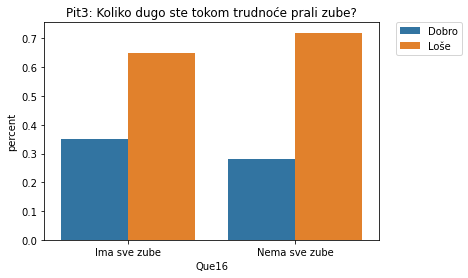

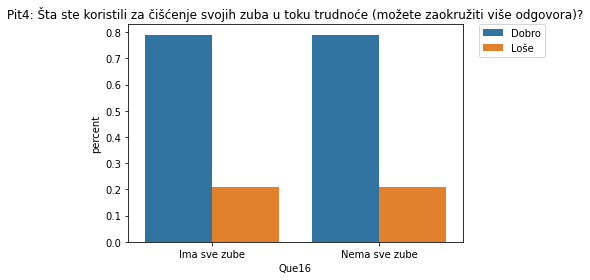

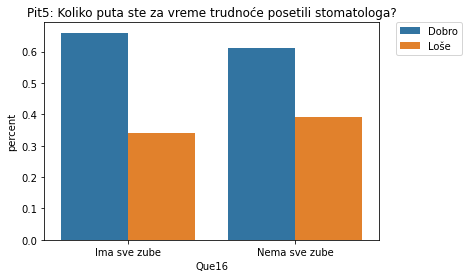

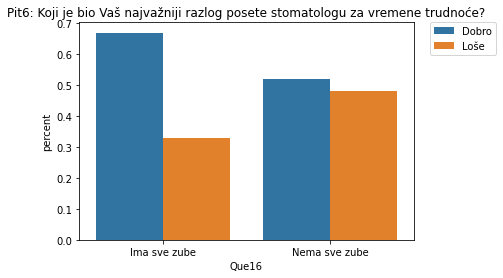

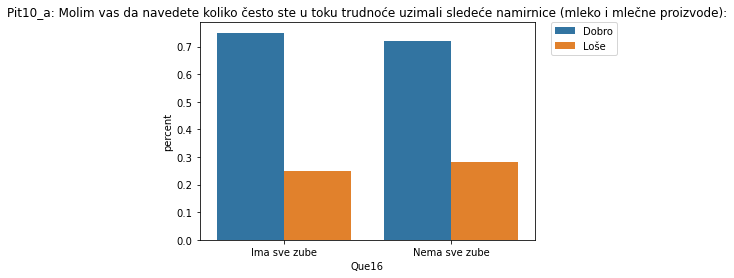

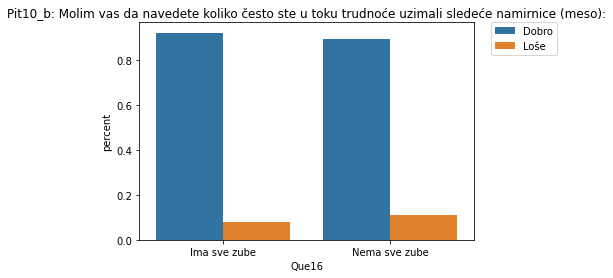

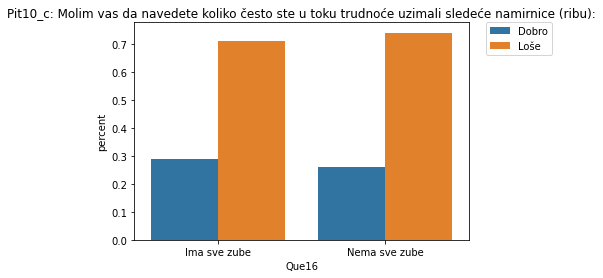

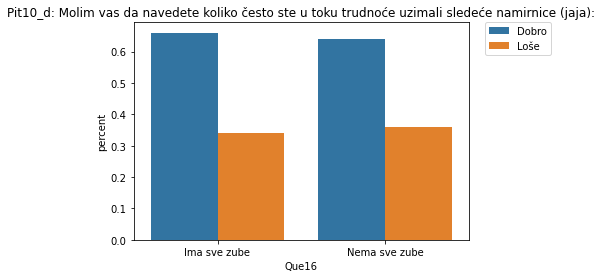

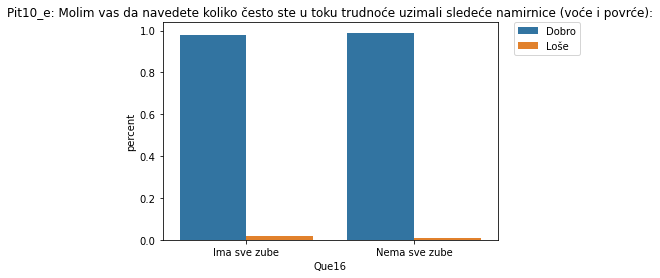

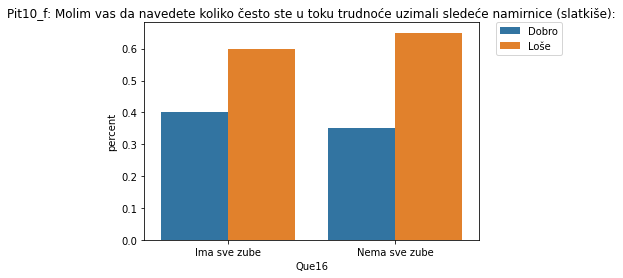

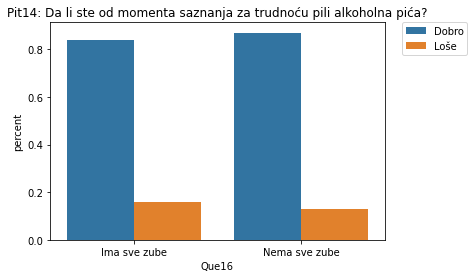

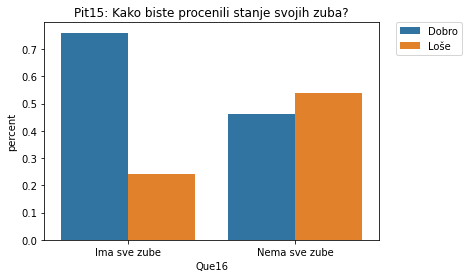

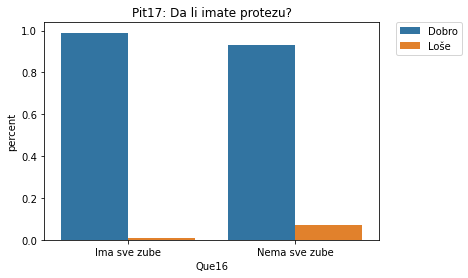

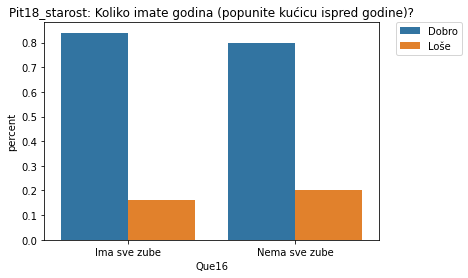

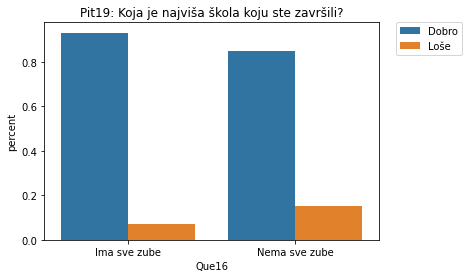

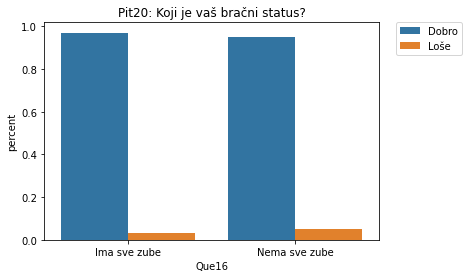

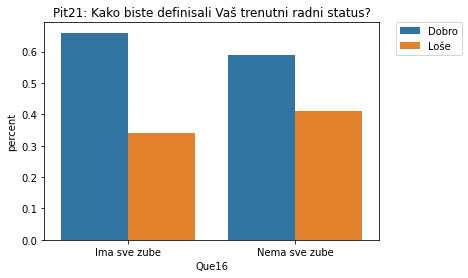

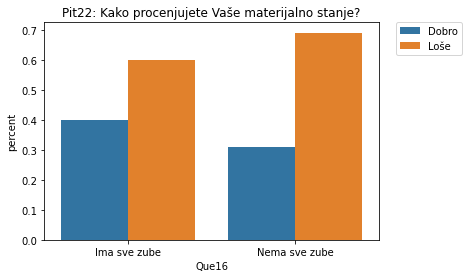

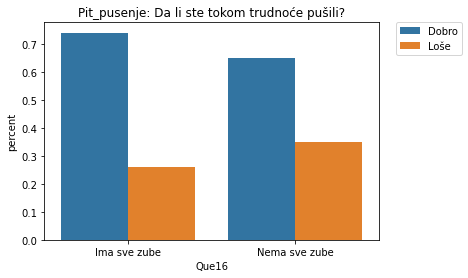

In [43]:
for col in data.columns:
    if col==target_col:
        continue
    else:
        counts_df = data.groupby([col, target_col])[col].count()
        counts_df = counts_df.unstack()
        percents_df = counts_df.div(counts_df.sum()).unstack()
        data_sub = percents_df.to_frame(name='percent').reset_index().round(2)
        #legend_labels = ['Good', 'Bad']
        legend_labels = ['Dobro', 'Loše']
        data_sub[col+'_legend'] = data_sub[col].map(dict(zip(range(0,2), legend_labels)))
        que16_text = ['Ima sve zube', 'Nema sve zube']
        data_sub[target_col+'_text'] = data_sub[target_col].map(dict(zip(range(0,2), que16_text)))
        fig, ax = plt.subplots()
        ax = sns.barplot(x=target_col+'_text', y='percent',  hue=col+'_legend', hue_order=legend_labels, data=data_sub)
        ax.set_xlabel('Que16')
        title = questions_LANG[col]['text'] 
        ax.set_title(col+': '+title)
        lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
        fig.savefig(FIG_DIR+col+'_map_proportion_ratio.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=fig.dpi)

In [44]:
for col in data.columns:
    counts_df = data.groupby([col, target_col])[col].count()
    num = counts_df.sum()
    counts_df = counts_df.unstack()
    percents_df = counts_df.div(counts_df.sum()).round(2)
    percents_df.to_csv(STAT_DIR+col+'_mapped_'+str(num)+'.csv')